✅ Data Loaded Successfully!
Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  

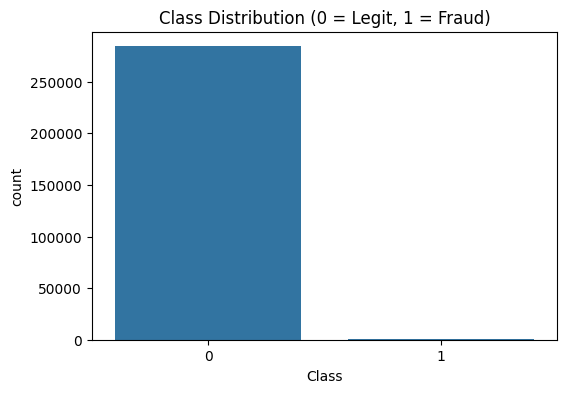

Fraud cases: 492, Legit cases: 284315


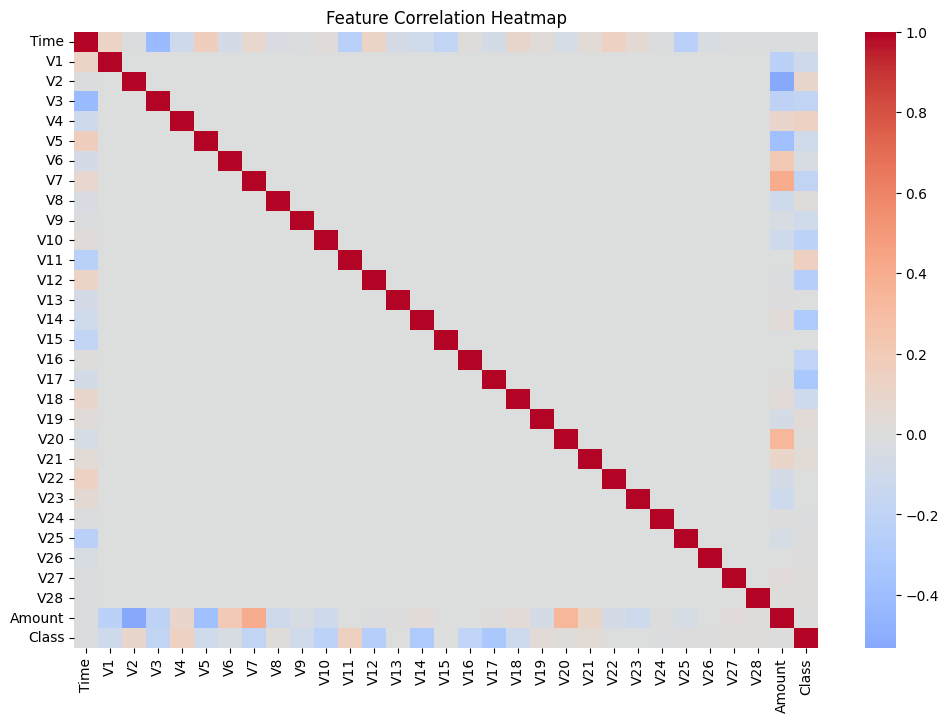

Training samples: 227845, Testing samples: 56962
After undersampling → Legit: 394, Fraud: 394

🎯 Model Evaluation:
Accuracy : 0.9640988729328324
Precision: 0.04231311706629055
Recall   : 0.9183673469387755
F1 Score : 0.08089887640449438

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



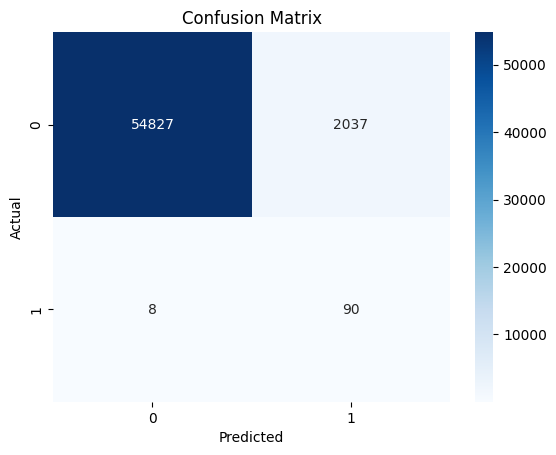


📊 Logistic Regression Results:
Accuracy : 0.9602717601207823
Precision: 0.03837953091684435
Recall   : 0.9183673469387755
F1 Score : 0.07367990176013099

💾 Model and Scaler saved successfully in '../model/' folder!


In [3]:
# ===============================================================
# 📘 CREDIT CARD FRAUD DETECTION — EDA AND MODEL TRAINING
# ===============================================================

# 1️⃣ IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# 2️⃣ LOAD DATA
df = pd.read_csv('../data/creditcard.csv')
print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
df.head()

# 3️⃣ BASIC INFO
df.info()
df.describe()

# 4️⃣ CHECK FOR NULLS
print("\nNull Values per Column:\n", df.isnull().sum().sum())

# 5️⃣ CLASS DISTRIBUTION
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

fraud_cases = df[df['Class'] == 1]
legit_cases = df[df['Class'] == 0]
print(f"Fraud cases: {len(fraud_cases)}, Legit cases: {len(legit_cases)}")

# 6️⃣ CORRELATION HEATMAP (Optional)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# 7️⃣ SPLIT FEATURES AND LABEL
X = df.drop(columns=['Class'])
y = df['Class']

# SCALE DATA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# TRAIN-TEST SPLIT (stratified because dataset is imbalanced)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 8️⃣ HANDLE IMBALANCE (OPTIONAL: use undersampling for quick test)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(f"After undersampling → Legit: {sum(y_res==0)}, Fraud: {sum(y_res==1)}")

# 9️⃣ TRAIN MODEL — RandomForest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_res, y_res)

# 10️⃣ PREDICT & EVALUATE
y_pred = rf.predict(X_test)

print("\n🎯 Model Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11️⃣ TRY LOGISTIC REGRESSION (for comparison)
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_res, y_res)
y_pred_log = log_model.predict(X_test)

print("\n📊 Logistic Regression Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))

# 12️⃣ SAVE MODEL AND SCALER
joblib.dump(rf, "../model/fraud_detection_model.pkl")
joblib.dump(scaler, "../model/scaler.pkl")

print("\n💾 Model and Scaler saved successfully in '../model/' folder!")
